<a href="https://colab.research.google.com/github/italolima04/estudo-covid-19-quixada/blob/master/Estudo_COVID_Quixad%C3%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas e Dados

In [3]:
#Importando as bibliotecas.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet

In [4]:
#Importando os dados e criando um Data Frame a partir destes.
df = pd.read_csv('Covid-Qxd.csv')

# Explorando dados

In [5]:
#Visualizando às 5 primeiras linhas do Data Frame.
df.head()

,data,confirmados,recuperados,obitos
0,03/20/2020,0,0,0
1,03/21/2020,0,0,0
2,03/22/2020,0,0,0
3,03/23/2020,0,0,0
4,03/24/2020,0,0,0


In [6]:
#Visualizando às 5 últimas linhas do Data Frame.
df.tail()

,data,confirmados,recuperados,obitos
100,06/28/2020,2160,1688,49
101,06/29/2020,2189,1754,50
102,06/30/2020,2225,1781,50
103,06/30/2020,2248,1853,50
104,06/30/2020,2292,1926,51


In [7]:
#Verificando a estrutura do Data Frame.
df.shape

(105, 4)

# Manipulando Dados

**Feature Engineering -> Criação de uma Nova Coluna a partir de outras já existentes no Data Frame.**

In [8]:
#A Taxa de Mortalidade é calculada a partir da divisão do número de óbitos / casos confirmados. 
death_rate = df['obitos'] / df['confirmados']
#Multiplica-se por 100 para obter esse valor em porcentagem.
death_rate = death_rate * 100 
#Formatando o resultado para somente 2 casas decimais.
death_rate = death_rate.round(2)
death_rate

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
100    2.27
101    2.28
102    2.25
103    2.22
104    2.23
Length: 105, dtype: float64

In [9]:
#Criando uma coluna no Data Frame e preenchendo-a com os dados criados acima.
df['taxa_mortalidade'] = death_rate
df

,data,confirmados,recuperados,obitos,taxa_mortalidade
0,03/20/2020,0,0,0,NaN
1,03/21/2020,0,0,0,NaN
2,03/22/2020,0,0,0,NaN
3,03/23/2020,0,0,0,NaN
4,03/24/2020,0,0,0,NaN
...,...,...,...,...,...
100,06/28/2020,2160,1688,49,2.27
101,06/29/2020,2189,1754,50,2.28
102,06/30/2020,2225,1781,50,2.25
103,06/30/2020,2248,1853,50,2.22


**Pode-se observar que nos primeiros dias, como não havia óbitos registrados, o númerador da nossa divisão é 0, e o resultado desta gera um valor NaN, podemos tratar esses dados.**

In [10]:
#Verificando a quantidade de Valores Nulos por Coluna.
df.isna().sum()

data                0
confirmados         0
recuperados         0
obitos              0
taxa_mortalidade    8
dtype: int64

In [11]:
df['taxa_mortalidade'].isna()

0       True
1       True
2       True
3       True
4       True
       ...  
100    False
101    False
102    False
103    False
104    False
Name: taxa_mortalidade, Length: 105, dtype: bool

In [12]:
#Atualizando o Data Frame a partir da aplicação do Método fillna() que substitui os valores nulos por 0.
df.update(df['taxa_mortalidade'].fillna(0))
df

,data,confirmados,recuperados,obitos,taxa_mortalidade
0,03/20/2020,0,0,0,0.00
1,03/21/2020,0,0,0,0.00
2,03/22/2020,0,0,0,0.00
3,03/23/2020,0,0,0,0.00
4,03/24/2020,0,0,0,0.00
...,...,...,...,...,...
100,06/28/2020,2160,1688,49,2.27
101,06/29/2020,2189,1754,50,2.28
102,06/30/2020,2225,1781,50,2.25
103,06/30/2020,2248,1853,50,2.22


In [13]:
#A Taxa de Recuperados pode ser calculada a partir da divisão do número de recuperados / casos confirmados. 
recovered_rate = df['recuperados'] / df['confirmados']
#Multiplica-se por 100 para obter esse valor em porcentagem.
recovered_rate = recovered_rate * 100 
#Formatando o resultado para somente 2 casas decimais.
recovered_rate = recovered_rate.round(2)
recovered_rate

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
100    78.15
101    80.13
102    80.04
103    82.43
104    84.03
Length: 105, dtype: float64

In [14]:
#Criando uma coluna no Data Frame e preenchendo-a com os dados criados acima.
df['taxa_recuperados'] = recovered_rate
df

,data,confirmados,recuperados,obitos,taxa_mortalidade,taxa_recuperados
0,03/20/2020,0,0,0,0.00,NaN
1,03/21/2020,0,0,0,0.00,NaN
2,03/22/2020,0,0,0,0.00,NaN
3,03/23/2020,0,0,0,0.00,NaN
4,03/24/2020,0,0,0,0.00,NaN
...,...,...,...,...,...,...
100,06/28/2020,2160,1688,49,2.27,78.15
101,06/29/2020,2189,1754,50,2.28,80.13
102,06/30/2020,2225,1781,50,2.25,80.04
103,06/30/2020,2248,1853,50,2.22,82.43


**Pode-se observar que nos primeiros dias, como não pessoas recuperadas, o númerador da nossa divisão é 0, e o resultado desta gera um valor NaN, podemos tratar esses dados.**

In [15]:
#Verificando a quantidade de Valores Nulos por Coluna.
df.isna().sum()

data                0
confirmados         0
recuperados         0
obitos              0
taxa_mortalidade    0
taxa_recuperados    8
dtype: int64

In [16]:
df['taxa_recuperados'].isna()

0       True
1       True
2       True
3       True
4       True
       ...  
100    False
101    False
102    False
103    False
104    False
Name: taxa_recuperados, Length: 105, dtype: bool

In [17]:
#Atualizando o Data Frame a partir da aplicação do Método fillna() que substitui os valores nulos por 0.
df.update(df['taxa_recuperados'].fillna(0))
df

,data,confirmados,recuperados,obitos,taxa_mortalidade,taxa_recuperados
0,03/20/2020,0,0,0,0.00,0.00
1,03/21/2020,0,0,0,0.00,0.00
2,03/22/2020,0,0,0,0.00,0.00
3,03/23/2020,0,0,0,0.00,0.00
4,03/24/2020,0,0,0,0.00,0.00
...,...,...,...,...,...,...
100,06/28/2020,2160,1688,49,2.27,78.15
101,06/29/2020,2189,1754,50,2.28,80.13
102,06/30/2020,2225,1781,50,2.25,80.04
103,06/30/2020,2248,1853,50,2.22,82.43


**A nível de exploração, podemos Verificar a Porcentagem entre Casos Abertos e Fechados**

Um caso é dito aberto quando o paciente ainda se encontra doente(dado que testou positivo para o exame de COVID).

Um caso é dito fechado em duas possíveis situações: 

1.  Se o paciente se recuperou

2.  Se o paciente veio a óbito




In [18]:
#Calculando a quantidade de Casos fechados.
closed_cases = df['obitos'][(df['obitos'].size - 1)] + df['recuperados'][(df['recuperados'].size - 1)]
closed_cases

1977

In [19]:
#Porcentagem de Casos fechados em relação ao total.
((closed_cases/df['confirmados'][(df['confirmados'].size - 1)]) * 100).round(2)

86.26

In [20]:
#Calculando a quantidade de Casos abertos.
open_cases = ((df['confirmados'][(df['confirmados'].size - 1)]) - closed_cases)
open_cases

315

In [21]:
#Porcentagem de Casos abertos em relação ao total.
((open_cases/df['confirmados'][(df['confirmados'].size - 1)]) * 100).round(2)

13.74

In [22]:
#Verificando a Descrição Estatística dos Dados.
df.describe()

,confirmados,recuperados,obitos,taxa_mortalidade,taxa_recuperados
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,612.447619,411.171429,15.180952,1.508571,47.364857
std,769.522342,563.128802,18.621111,1.285434,30.817585
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000
50%,112.000000,62.000000,2.000000,2.130000,56.880000
75%,1259.000000,794.000000,34.000000,2.560000,68.480000
max,2292.000000,1926.000000,51.000000,4.320000,90.910000


**A partir dessa descrição podemos fazer algumas observações, como:**

O Desvio Padrão tem valor muito elevado para os casos confirmados e recuperados pela grande variação que esses apresentam (crescimento).

A taxa de mortalidade máxima para a cidade de Quixadá foi 4.32%, ou seja, em seu ápice esse valor ainda é menor que a taxa atual para o Brasil. Taxa no Brasil no dia 24/06/2020: 4.6%

# Visualizando Gráficos

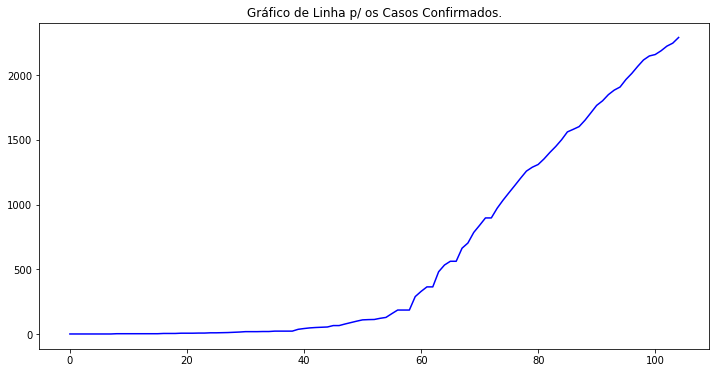

In [23]:
df['confirmados'].plot(figsize=(12, 6), color='blue')
plt.title('Gráfico de Linha p/ os Casos Confirmados.')
plt.show()

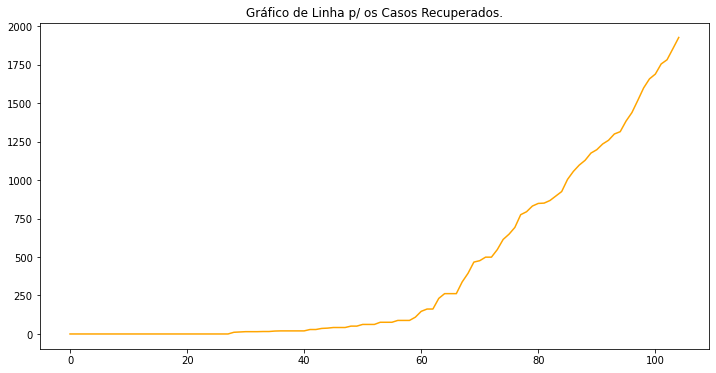

In [24]:
df['recuperados'].plot(figsize=(12, 6), color='orange')
plt.title('Gráfico de Linha p/ os Casos Recuperados.')
plt.show()

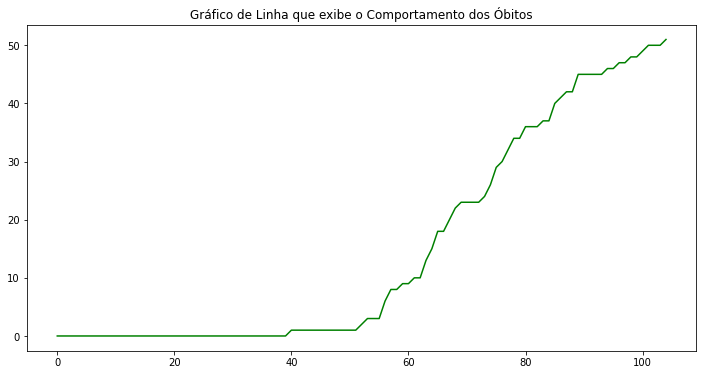

In [25]:
df['obitos'].plot(figsize=(12, 6), color='green')
plt.title('Gráfico de Linha que exibe o Comportamento dos Óbitos')
plt.show()

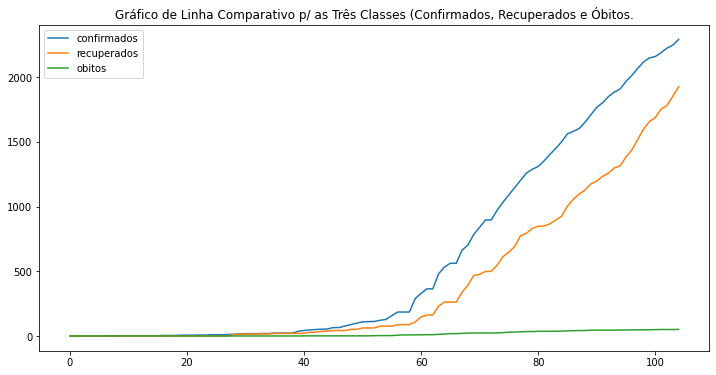

In [26]:
df_plot = df[['confirmados', 'recuperados', 'obitos']]
df_plot.plot(figsize=(12, 6))
plt.title('Gráfico de Linha Comparativo p/ as Três Classes (Confirmados, Recuperados e Óbitos.')
plt.show()

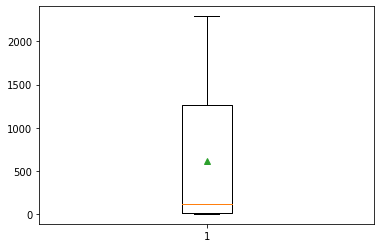

In [27]:
#Gráfico de Caixa p/ os Confirmados.
plt.boxplot(df['confirmados'], showmeans=True);

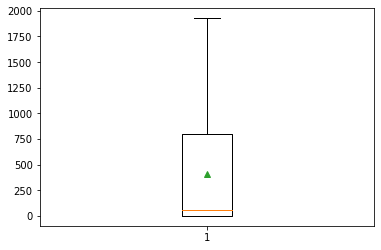

In [28]:
#Gráfico de Caixa p/ os Recuperados.
plt.boxplot(df['recuperados'], showmeans=True);

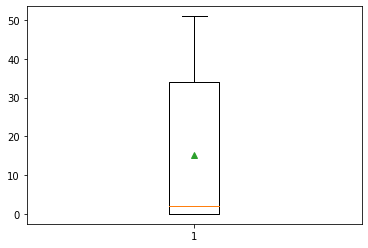

In [29]:
#Gráfico de Caixa p/ os Óbitos.
plt.boxplot(df['obitos'], showmeans=True);

#Formatando os Dados

**Prophet From Facebook**

O Prophet é um framework do Facebook e segue o modelo de API Scikit Learn (Biblioteca de Machine Learning bastente utilizada).
Ou seja: Primeiro cria-se uma instância da classe prophet e depois utiliza os métodos **fit** e **predict**. 

O Prophet tem seu backend programado em uma linguagem de programação probabilística chamada STAN, cuja é baseada nas estatísticas bayesianas e por isso pode oferecer vantagens para esses tipos de estudos.
Ex: Intervalos de Confiança

**Intervalo de Confiança**

Utilizaremos um intervalo de 95% de confiança, ou seja, teremos 5% de significância. Medida bastante utilizada para pesquisas.

Mas o que é um intervalo de confiança ?

Um intervalo de Confiança pode ser representado da seguinte forma:

c = média amostral - margem de erro < média populacional < média amostral + margem de erro

ds é uma coluna de date e deve possuir o formato esperado pelo Pandas: AAAA-MM-DD

y deve ser uma coluna numérica e representa a medida que desejamos prever

2 Critérios: 

1- Renomear colunas de acordo com o exigido pelo Prophet

2- Formatar data de acordo com o exigido pelo Prophet

In [30]:
#Criando Data Frame Vazio.
confirmed = pd.DataFrame()
#Criando coluna de Data e formatando esses dados para o Prophet.
confirmed['ds'] = pd.to_datetime(df['data'])
#Criando coluna de confirmados para o novo Data Frame.
confirmed['y'] = df['confirmados']
#Visualizando às 5 últimas linhas.
confirmed.tail()

,ds,y
100,2020-06-28,2160
101,2020-06-29,2189
102,2020-06-30,2225
103,2020-06-30,2248
104,2020-06-30,2292


In [31]:
#Verificando o formato dos dados.
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      105 non-null    datetime64[ns]
 1   y       105 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [32]:
#Criando Data Frame Vazio.
deaths = pd.DataFrame()
#Criando coluna de Data e formatando esses dados para o Prophet.
deaths['ds'] = pd.to_datetime(df['data'])
#Criando coluna de confirmados para o novo Data Frame.
deaths['y'] = df['obitos']
#Visualizando às 5 últimas linhas.
deaths.tail()

,ds,y
100,2020-06-28,49
101,2020-06-29,50
102,2020-06-30,50
103,2020-06-30,50
104,2020-06-30,51


In [33]:
#Verificando o formato dos dados.
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      105 non-null    datetime64[ns]
 1   y       105 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


# Instanciando e Configurando o Prophet para os dados de Confirmados

In [34]:
#Criando instância da Classe Prophet e estabelecendo o Nível de Confiança.
prophet = Prophet(interval_width=0.95)

In [35]:
#Treinando o Modelo.
prophet.fit(confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Será feita uma previsão para os próximos 7, 15 e 30 dias.**

# Prevendo o Número de Confirmados para os Próximos 7 dias

In [36]:
#Parâmetro que recebe a quantidade de dias.
confirmed_7 = prophet.make_future_dataframe(periods=7)
#Verificando quais serão esses próximos x dias
confirmed_7.tail(7)

,ds
105,2020-07-01
106,2020-07-02
107,2020-07-03
108,2020-07-04
109,2020-07-05
110,2020-07-06
111,2020-07-07


In [37]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(confirmed_7)
prevision.tail(7)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2020-07-01,2305.862950,2279.031272,2331.481702,2303.679655,2307.853369,-0.784452,-0.784452,-0.784452,-0.784452,-0.784452,-0.784452,0.0,0.0,0.0,2305.078497
106,2020-07-02,2348.460158,2324.263807,2377.754985,2342.529068,2355.052749,1.233310,1.233310,1.233310,1.233310,1.233310,1.233310,0.0,0.0,0.0,2349.693468
107,2020-07-03,2391.057366,2371.578124,2426.073581,2379.655775,2402.916581,8.409865,8.409865,8.409865,8.409865,8.409865,8.409865,0.0,0.0,0.0,2399.467232
108,2020-07-04,2433.654575,2412.607794,2472.434284,2416.057661,2451.506617,7.706899,7.706899,7.706899,7.706899,7.706899,7.706899,0.0,0.0,0.0,2441.361473
109,2020-07-05,2476.251783,2434.079881,2505.508694,2448.628951,2501.629512,-5.561212,-5.561212,-5.561212,-5.561212,-5.561212,-5.561212,0.0,0.0,0.0,2470.690571
110,2020-07-06,2518.848991,2473.515635,2549.639402,2484.262953,2551.279692,-8.758711,-8.758711,-8.758711,-8.758711,-8.758711,-8.758711,0.0,0.0,0.0,2510.090280
111,2020-07-07,2561.446199,2515.799334,2611.053320,2517.966020,2603.728171,-2.245699,-2.245699,-2.245699,-2.245699,-2.245699,-2.245699,0.0,0.0,0.0,2559.200500


In [38]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(7)

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-01,2279.031272,2305.078497,2331.481702
106,2020-07-02,2324.263807,2349.693468,2377.754985
107,2020-07-03,2371.578124,2399.467232,2426.073581
108,2020-07-04,2412.607794,2441.361473,2472.434284
109,2020-07-05,2434.079881,2470.690571,2505.508694
110,2020-07-06,2473.515635,2510.090280,2549.639402
111,2020-07-07,2515.799334,2559.200500,2611.053320


In [39]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(7).round()

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-01,2279.0,2305.0,2331.0
106,2020-07-02,2324.0,2350.0,2378.0
107,2020-07-03,2372.0,2399.0,2426.0
108,2020-07-04,2413.0,2441.0,2472.0
109,2020-07-05,2434.0,2471.0,2506.0
110,2020-07-06,2474.0,2510.0,2550.0
111,2020-07-07,2516.0,2559.0,2611.0


Função que plota o gráfico exibindo a comparação entre linha dos dados e a da previsão (que se ajusta de acordo com o intervalo de confiança).


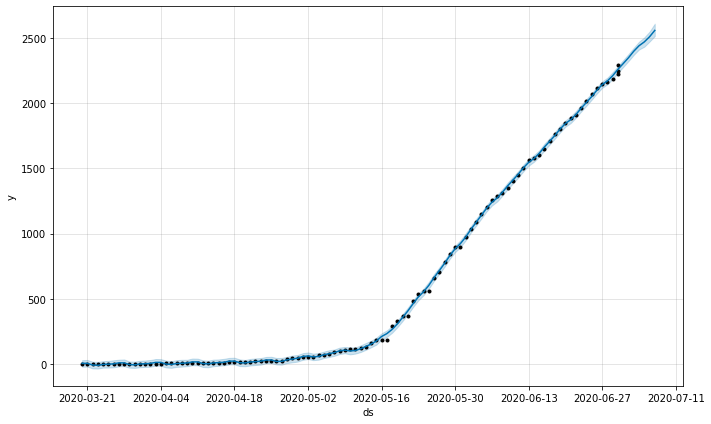

In [40]:
confirmed_fore_cast_plot =  prophet.plot(prevision)

# Prevendo o Número de Confirmados para os próximos 15 dias

In [41]:
#Parâmetro que recebe a quantidade de dias.
confirmed_15 = prophet.make_future_dataframe(periods=15)
#Verificando quais serão esses próximos x dias
confirmed_15.tail(15)

,ds
105,2020-07-01
106,2020-07-02
107,2020-07-03
108,2020-07-04
109,2020-07-05
110,2020-07-06
111,2020-07-07
112,2020-07-08
113,2020-07-09
114,2020-07-10


In [42]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(confirmed_15)
prevision.tail(15)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2020-07-01,2305.862950,2279.293540,2328.942725,2303.680261,2308.319016,-0.784452,-0.784452,-0.784452,-0.784452,-0.784452,-0.784452,0.0,0.0,0.0,2305.078497
106,2020-07-02,2348.460158,2323.736823,2376.753703,2341.288580,2356.033560,1.233310,1.233310,1.233310,1.233310,1.233310,1.233310,0.0,0.0,0.0,2349.693468
107,2020-07-03,2391.057366,2370.962770,2429.650184,2377.498644,2405.554990,8.409865,8.409865,8.409865,8.409865,8.409865,8.409865,0.0,0.0,0.0,2399.467232
108,2020-07-04,2433.654575,2411.380115,2471.873975,2414.086709,2455.763235,7.706899,7.706899,7.706899,7.706899,7.706899,7.706899,0.0,0.0,0.0,2441.361473
109,2020-07-05,2476.251783,2436.021140,2506.877865,2450.010164,2506.551672,-5.561212,-5.561212,-5.561212,-5.561212,-5.561212,-5.561212,0.0,0.0,0.0,2470.690571
110,2020-07-06,2518.848991,2469.775731,2548.310100,2483.437598,2557.825339,-8.758711,-8.758711,-8.758711,-8.758711,-8.758711,-8.758711,0.0,0.0,0.0,2510.090280
111,2020-07-07,2561.446199,2512.026403,2612.097583,2518.707710,2609.397661,-2.245699,-2.245699,-2.245699,-2.245699,-2.245699,-2.245699,0.0,0.0,0.0,2559.200500
112,2020-07-08,2604.043408,2546.688899,2669.706839,2552.797816,2662.235338,-0.784452,-0.784452,-0.784452,-0.784452,-0.784452,-0.784452,0.0,0.0,0.0,2603.258955
113,2020-07-09,2646.640616,2582.422165,2716.898894,2587.823301,2714.239916,1.233310,1.233310,1.233310,1.233310,1.233310,1.233310,0.0,0.0,0.0,2647.873926
114,2020-07-10,2689.237824,2622.760422,2780.654257,2621.485593,2768.361890,8.409865,8.409865,8.409865,8.409865,8.409865,8.409865,0.0,0.0,0.0,2697.647690


In [43]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(15)

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-01,2279.293540,2305.078497,2328.942725
106,2020-07-02,2323.736823,2349.693468,2376.753703
107,2020-07-03,2370.962770,2399.467232,2429.650184
108,2020-07-04,2411.380115,2441.361473,2471.873975
109,2020-07-05,2436.021140,2470.690571,2506.877865
110,2020-07-06,2469.775731,2510.090280,2548.310100
111,2020-07-07,2512.026403,2559.200500,2612.097583
112,2020-07-08,2546.688899,2603.258955,2669.706839
113,2020-07-09,2582.422165,2647.873926,2716.898894
114,2020-07-10,2622.760422,2697.647690,2780.654257


In [44]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(15).round()

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-01,2279.0,2305.0,2329.0
106,2020-07-02,2324.0,2350.0,2377.0
107,2020-07-03,2371.0,2399.0,2430.0
108,2020-07-04,2411.0,2441.0,2472.0
109,2020-07-05,2436.0,2471.0,2507.0
110,2020-07-06,2470.0,2510.0,2548.0
111,2020-07-07,2512.0,2559.0,2612.0
112,2020-07-08,2547.0,2603.0,2670.0
113,2020-07-09,2582.0,2648.0,2717.0
114,2020-07-10,2623.0,2698.0,2781.0


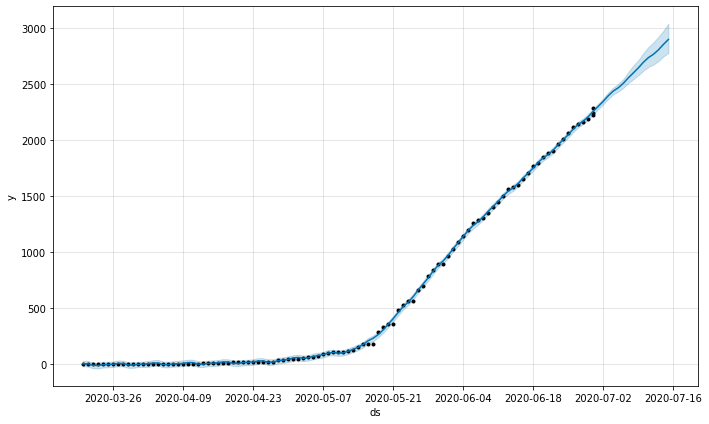

In [45]:
confirmed_fore_cast_plot =  prophet.plot(prevision)

# Prevendo o Número de Confirmados para os próximos 30 dias

In [46]:
#Parâmetro que recebe a quantidade de dias.
confirmed_30 = prophet.make_future_dataframe(periods=30)
#Verificando quais serão esses próximos x dias
confirmed_30.tail(30)

,ds
105,2020-07-01
106,2020-07-02
107,2020-07-03
108,2020-07-04
109,2020-07-05
110,2020-07-06
111,2020-07-07
112,2020-07-08
113,2020-07-09
114,2020-07-10


In [47]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(confirmed_30)
prevision.tail(30)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2020-07-01,2305.862950,2279.413007,2330.680801,2304.066795,2308.399598,-0.784452,-0.784452,-0.784452,-0.784452,-0.784452,-0.784452,0.0,0.0,0.0,2305.078497
106,2020-07-02,2348.460158,2323.595352,2377.481909,2342.715821,2355.647373,1.233310,1.233310,1.233310,1.233310,1.233310,1.233310,0.0,0.0,0.0,2349.693468
107,2020-07-03,2391.057366,2370.806045,2427.588054,2380.482532,2405.671667,8.409865,8.409865,8.409865,8.409865,8.409865,8.409865,0.0,0.0,0.0,2399.467232
108,2020-07-04,2433.654575,2412.980364,2475.979765,2417.862998,2455.350974,7.706899,7.706899,7.706899,7.706899,7.706899,7.706899,0.0,0.0,0.0,2441.361473
109,2020-07-05,2476.251783,2438.970492,2506.192654,2453.938466,2505.531077,-5.561212,-5.561212,-5.561212,-5.561212,-5.561212,-5.561212,0.0,0.0,0.0,2470.690571
110,2020-07-06,2518.848991,2472.859179,2555.305411,2490.394567,2557.050964,-8.758711,-8.758711,-8.758711,-8.758711,-8.758711,-8.758711,0.0,0.0,0.0,2510.090280
111,2020-07-07,2561.446199,2513.379114,2609.726815,2524.110373,2606.148673,-2.245699,-2.245699,-2.245699,-2.245699,-2.245699,-2.245699,0.0,0.0,0.0,2559.200500
112,2020-07-08,2604.043408,2552.492211,2659.989470,2558.476642,2659.246758,-0.784452,-0.784452,-0.784452,-0.784452,-0.784452,-0.784452,0.0,0.0,0.0,2603.258955
113,2020-07-09,2646.640616,2589.207748,2714.471177,2590.762543,2711.162047,1.233310,1.233310,1.233310,1.233310,1.233310,1.233310,0.0,0.0,0.0,2647.873926
114,2020-07-10,2689.237824,2627.969880,2775.404558,2623.957602,2765.257173,8.409865,8.409865,8.409865,8.409865,8.409865,8.409865,0.0,0.0,0.0,2697.647690


In [48]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(30)

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-01,2279.413007,2305.078497,2330.680801
106,2020-07-02,2323.595352,2349.693468,2377.481909
107,2020-07-03,2370.806045,2399.467232,2427.588054
108,2020-07-04,2412.980364,2441.361473,2475.979765
109,2020-07-05,2438.970492,2470.690571,2506.192654
110,2020-07-06,2472.859179,2510.090280,2555.305411
111,2020-07-07,2513.379114,2559.200500,2609.726815
112,2020-07-08,2552.492211,2603.258955,2659.989470
113,2020-07-09,2589.207748,2647.873926,2714.471177
114,2020-07-10,2627.969880,2697.647690,2775.404558


In [49]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(30).round()

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-01,2279.0,2305.0,2331.0
106,2020-07-02,2324.0,2350.0,2377.0
107,2020-07-03,2371.0,2399.0,2428.0
108,2020-07-04,2413.0,2441.0,2476.0
109,2020-07-05,2439.0,2471.0,2506.0
110,2020-07-06,2473.0,2510.0,2555.0
111,2020-07-07,2513.0,2559.0,2610.0
112,2020-07-08,2552.0,2603.0,2660.0
113,2020-07-09,2589.0,2648.0,2714.0
114,2020-07-10,2628.0,2698.0,2775.0


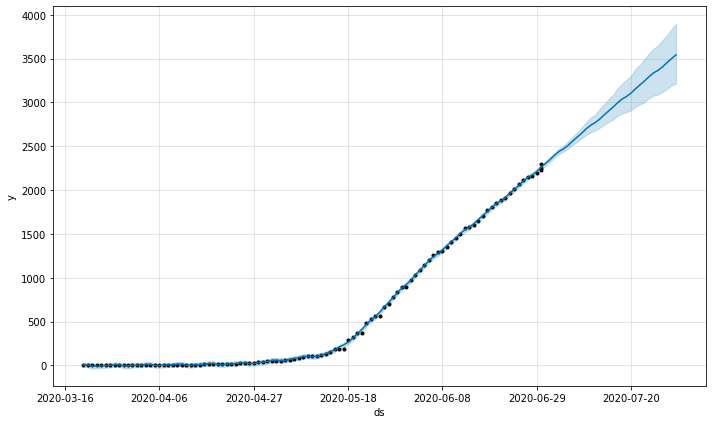

In [50]:
confirmed_fore_cast_plot =  prophet.plot(prevision)

**Observe que quanto maior a quantidade de dias, maior a "margem" de erro estabelecida, isso se dá devido a baixa quantidade de dados para o treinamento do modelo.**

# Instanciando e Configurando o Prophet para os dados de Mortes

In [51]:
#Criando instância da Classe Prophet e estabelecendo o Nível de Confiança.
prophet = Prophet(interval_width=0.95)

In [52]:
#Treinando o Modelo.
prophet.fit(deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


**Será feita uma previsão para os próximos 7, 15 e 30 dias.**

# Prevendo o Número de Mortes para os Próximos 7 dias

In [53]:
#Parâmetro que recebe a quantidade de dias.
deaths_7 = prophet.make_future_dataframe(periods=7)
#Verificando quais serão esses próximos x dias
deaths_7.tail(7)

,ds
105,2020-07-01
106,2020-07-02
107,2020-07-03
108,2020-07-04
109,2020-07-05
110,2020-07-06
111,2020-07-07


In [54]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(deaths_7)
prevision.tail(7)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2020-07-01,51.842567,50.345141,53.726756,51.771099,51.882161,0.182736,0.182736,0.182736,0.182736,0.182736,0.182736,0.0,0.0,0.0,52.025303
106,2020-07-02,52.531485,50.627549,54.157214,52.324355,52.686966,-0.123980,-0.123980,-0.123980,-0.123980,-0.123980,-0.123980,0.0,0.0,0.0,52.407504
107,2020-07-03,53.220403,51.597012,54.898420,52.822463,53.535106,0.030720,0.030720,0.030720,0.030720,0.030720,0.030720,0.0,0.0,0.0,53.251123
108,2020-07-04,53.909321,52.361525,55.843355,53.279964,54.410806,0.146446,0.146446,0.146446,0.146446,0.146446,0.146446,0.0,0.0,0.0,54.055767
109,2020-07-05,54.598239,52.756455,56.364545,53.721109,55.296506,-0.025072,-0.025072,-0.025072,-0.025072,-0.025072,-0.025072,0.0,0.0,0.0,54.573167
110,2020-07-06,55.287158,53.201180,57.032976,54.118318,56.166394,0.002268,0.002268,0.002268,0.002268,0.002268,0.002268,0.0,0.0,0.0,55.289426
111,2020-07-07,55.976076,53.837262,57.694614,54.587540,57.080037,-0.213118,-0.213118,-0.213118,-0.213118,-0.213118,-0.213118,0.0,0.0,0.0,55.762958


In [55]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(7)

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-01,50.345141,52.025303,53.726756
106,2020-07-02,50.627549,52.407504,54.157214
107,2020-07-03,51.597012,53.251123,54.898420
108,2020-07-04,52.361525,54.055767,55.843355
109,2020-07-05,52.756455,54.573167,56.364545
110,2020-07-06,53.201180,55.289426,57.032976
111,2020-07-07,53.837262,55.762958,57.694614


In [56]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(7).round()

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-01,50.0,52.0,54.0
106,2020-07-02,51.0,52.0,54.0
107,2020-07-03,52.0,53.0,55.0
108,2020-07-04,52.0,54.0,56.0
109,2020-07-05,53.0,55.0,56.0
110,2020-07-06,53.0,55.0,57.0
111,2020-07-07,54.0,56.0,58.0


Função que plota o gráfico exibindo a comparação entre linha dos dados e a da previsão (que se ajusta de acordo com o intervalo de confiança).


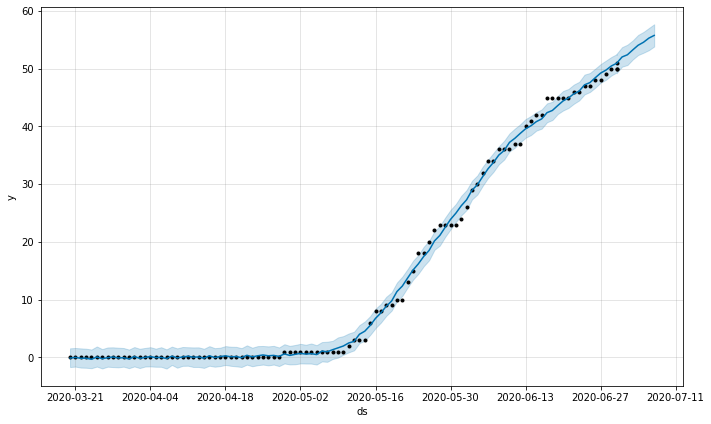

In [57]:
deaths_fore_cast_plot =  prophet.plot(prevision)

# Prevendo o Número de Mortes para os próximos 15 dias

In [58]:
#Parâmetro que recebe a quantidade de dias.
deaths_15 = prophet.make_future_dataframe(periods=15)
#Verificando quais serão esses próximos x dias
deaths_15.tail(15)

,ds
105,2020-07-01
106,2020-07-02
107,2020-07-03
108,2020-07-04
109,2020-07-05
110,2020-07-06
111,2020-07-07
112,2020-07-08
113,2020-07-09
114,2020-07-10


In [59]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(deaths_15)
prevision.tail(15)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2020-07-01,51.842567,50.392148,53.671564,51.785769,51.893033,0.182736,0.182736,0.182736,0.182736,0.182736,0.182736,0.0,0.0,0.0,52.025303
106,2020-07-02,52.531485,50.870244,53.976321,52.350334,52.710951,-0.123980,-0.123980,-0.123980,-0.123980,-0.123980,-0.123980,0.0,0.0,0.0,52.407504
107,2020-07-03,53.220403,51.482684,55.004193,52.894382,53.566089,0.030720,0.030720,0.030720,0.030720,0.030720,0.030720,0.0,0.0,0.0,53.251123
108,2020-07-04,53.909321,52.321098,55.687042,53.432238,54.415875,0.146446,0.146446,0.146446,0.146446,0.146446,0.146446,0.0,0.0,0.0,54.055767
109,2020-07-05,54.598239,52.869310,56.373647,53.937450,55.359707,-0.025072,-0.025072,-0.025072,-0.025072,-0.025072,-0.025072,0.0,0.0,0.0,54.573167
110,2020-07-06,55.287158,53.510997,57.066813,54.402047,56.255519,0.002268,0.002268,0.002268,0.002268,0.002268,0.002268,0.0,0.0,0.0,55.289426
111,2020-07-07,55.976076,53.861644,57.659338,54.860548,57.236733,-0.213118,-0.213118,-0.213118,-0.213118,-0.213118,-0.213118,0.0,0.0,0.0,55.762958
112,2020-07-08,56.664994,54.836318,59.012692,55.353004,58.192334,0.182736,0.182736,0.182736,0.182736,0.182736,0.182736,0.0,0.0,0.0,56.847730
113,2020-07-09,57.353912,54.888625,59.370121,55.730811,59.182500,-0.123980,-0.123980,-0.123980,-0.123980,-0.123980,-0.123980,0.0,0.0,0.0,57.229932
114,2020-07-10,58.042830,55.667996,60.456558,56.141704,60.096484,0.030720,0.030720,0.030720,0.030720,0.030720,0.030720,0.0,0.0,0.0,58.073550


In [60]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(15)

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-01,50.392148,52.025303,53.671564
106,2020-07-02,50.870244,52.407504,53.976321
107,2020-07-03,51.482684,53.251123,55.004193
108,2020-07-04,52.321098,54.055767,55.687042
109,2020-07-05,52.869310,54.573167,56.373647
110,2020-07-06,53.510997,55.289426,57.066813
111,2020-07-07,53.861644,55.762958,57.659338
112,2020-07-08,54.836318,56.847730,59.012692
113,2020-07-09,54.888625,57.229932,59.370121
114,2020-07-10,55.667996,58.073550,60.456558


In [61]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(15).round()

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-01,50.0,52.0,54.0
106,2020-07-02,51.0,52.0,54.0
107,2020-07-03,51.0,53.0,55.0
108,2020-07-04,52.0,54.0,56.0
109,2020-07-05,53.0,55.0,56.0
110,2020-07-06,54.0,55.0,57.0
111,2020-07-07,54.0,56.0,58.0
112,2020-07-08,55.0,57.0,59.0
113,2020-07-09,55.0,57.0,59.0
114,2020-07-10,56.0,58.0,60.0


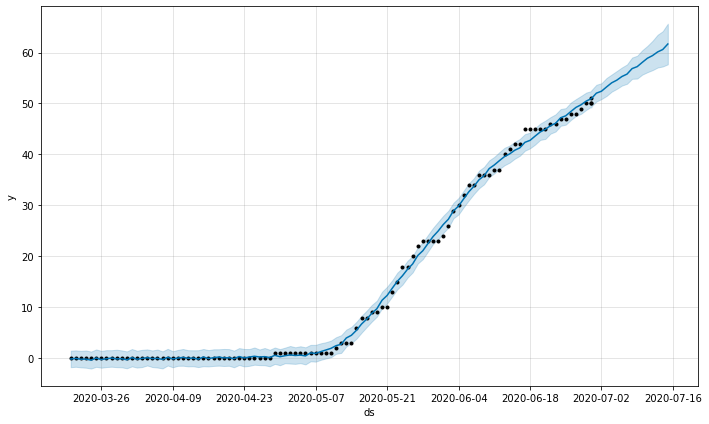

In [62]:
deaths =  prophet.plot(prevision)

# Prevendo o Número de Mortes para os próximos 30 dias

In [63]:
#Parâmetro que recebe a quantidade de dias.
deaths_30 = prophet.make_future_dataframe(periods=30)
#Verificando quais serão esses próximos x dias
deaths_30.tail(30)

,ds
105,2020-07-01
106,2020-07-02
107,2020-07-03
108,2020-07-04
109,2020-07-05
110,2020-07-06
111,2020-07-07
112,2020-07-08
113,2020-07-09
114,2020-07-10


In [64]:
#Função que realiza a "previsão", através do método predict (Equivalente ao da biblitoeca Scikit Learn).
prevision = prophet.predict(deaths_30)
prevision.tail(30)
#tendência | previsão p/ baixo | previsão p/ cima | erro baixo | erro alto |.
#as colunas ds, yhat e suas variações (lower, upper) serão as utilizadas no estudo.

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
105,2020-07-01,51.842567,50.410730,53.679078,51.778256,51.893625,0.182736,0.182736,0.182736,0.182736,0.182736,0.182736,0.0,0.0,0.0,52.025303
106,2020-07-02,52.531485,50.859623,54.031392,52.332929,52.709478,-0.123980,-0.123980,-0.123980,-0.123980,-0.123980,-0.123980,0.0,0.0,0.0,52.407504
107,2020-07-03,53.220403,51.672948,54.857732,52.860996,53.543524,0.030720,0.030720,0.030720,0.030720,0.030720,0.030720,0.0,0.0,0.0,53.251123
108,2020-07-04,53.909321,52.427834,55.640259,53.327533,54.408584,0.146446,0.146446,0.146446,0.146446,0.146446,0.146446,0.0,0.0,0.0,54.055767
109,2020-07-05,54.598239,52.910075,56.345772,53.812806,55.344134,-0.025072,-0.025072,-0.025072,-0.025072,-0.025072,-0.025072,0.0,0.0,0.0,54.573167
110,2020-07-06,55.287158,53.348362,57.194618,54.285103,56.259562,0.002268,0.002268,0.002268,0.002268,0.002268,0.002268,0.0,0.0,0.0,55.289426
111,2020-07-07,55.976076,53.633677,57.784800,54.795551,57.211873,-0.213118,-0.213118,-0.213118,-0.213118,-0.213118,-0.213118,0.0,0.0,0.0,55.762958
112,2020-07-08,56.664994,54.727199,59.119638,55.234642,58.119287,0.182736,0.182736,0.182736,0.182736,0.182736,0.182736,0.0,0.0,0.0,56.847730
113,2020-07-09,57.353912,55.010684,59.398980,55.657357,59.077053,-0.123980,-0.123980,-0.123980,-0.123980,-0.123980,-0.123980,0.0,0.0,0.0,57.229932
114,2020-07-10,58.042830,55.518020,60.590546,56.037752,59.948151,0.030720,0.030720,0.030720,0.030720,0.030720,0.030720,0.0,0.0,0.0,58.073550


In [65]:
#Exibição de coluna na ordem: melhor caso | caso médio | pior caso (nesse contexto).
prevision = prevision[['ds', 'yhat_lower', 'yhat', 'yhat_upper']]
prevision.tail(30)

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-01,50.410730,52.025303,53.679078
106,2020-07-02,50.859623,52.407504,54.031392
107,2020-07-03,51.672948,53.251123,54.857732
108,2020-07-04,52.427834,54.055767,55.640259
109,2020-07-05,52.910075,54.573167,56.345772
110,2020-07-06,53.348362,55.289426,57.194618
111,2020-07-07,53.633677,55.762958,57.784800
112,2020-07-08,54.727199,56.847730,59.119638
113,2020-07-09,55.010684,57.229932,59.398980
114,2020-07-10,55.518020,58.073550,60.590546


In [66]:
#Visualizando a previsão (com dados arredondados) para os próximos 7 dias.
prevision.tail(30).round()

,ds,yhat_lower,yhat,yhat_upper
105,2020-07-01,50.0,52.0,54.0
106,2020-07-02,51.0,52.0,54.0
107,2020-07-03,52.0,53.0,55.0
108,2020-07-04,52.0,54.0,56.0
109,2020-07-05,53.0,55.0,56.0
110,2020-07-06,53.0,55.0,57.0
111,2020-07-07,54.0,56.0,58.0
112,2020-07-08,55.0,57.0,59.0
113,2020-07-09,55.0,57.0,59.0
114,2020-07-10,56.0,58.0,61.0


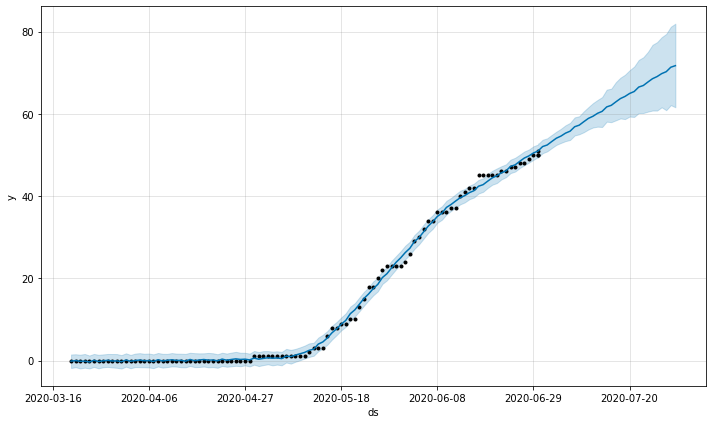

In [67]:
deaths_fore_cast_plot =  prophet.plot(prevision)

**Observe que quanto maior a quantidade de dias, maior a "margem" de erro estabelecida, isso se dá devido a baixa quantidade de dados para o treinamento do modelo.**

# Estudando a Correlação 

In [76]:
#Iniciando Data Frame vazio.
df_correlation = pd.DataFrame()

In [77]:
#Preenchendo Data Frame a partir da concatenação de 2 Series no Data Frame Original.
df_correlation = pd.concat([df['confirmados'], df['obitos']], ignore_index=True, axis=1)

In [78]:
#Renomeando as Colunas do Novo Data Frame e visualizando às 10 últimas linhas.
df_correlation.columns = [['Confirmados', 'Mortes']]
df_correlation.tail(10)

,Confirmados,Mortes
95,1967,46
96,2014,47
97,2068,47
98,2118,48
99,2149,48
100,2160,49
101,2189,50
102,2225,50
103,2248,50
104,2292,51


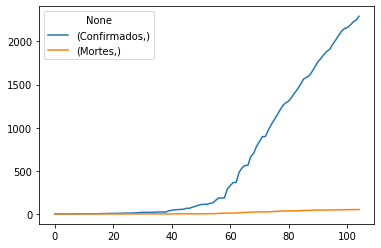

In [79]:
#Plotando Gráfico de Linha
df_correlation.plot()

Será utilizado o método de Pearson para identificar a correlação entre as duas variáveis.


**Se as duas variáveis possuem o mesmo tipo de comportamento (ex: uma sobe e a outra sobe, ou uma sobe e a outra desce = correlação positiva).**

**Se as duas variáveis possuem o diferentes tipos de comportamento (ex: uma sobe e a outra desce, ou uma desce e a outra sobe = correlação negativa).**

In [80]:
#Utilizando Método que calcula o coeficiente de Correlação através do Método de Pearson.
df_correlation.corr(method='pearson')

,Confirmados,Mortes
Confirmados,1.000000,0.994593
Mortes,0.994593,1.000000


**É possível verificar a alta correlação positiva, sinalizando uma possibilidade: Quantos mais casos confirmados, mais mortes.**

No entanto, apenas pelo coeficiente de correlação não é possível fazer afirmações como esta, mesmo que o cenário pareça "óbvio", faz-se necessário a realização de testes estatísticos.

Podemos realizar esse estudo utilizando uma outra Biblioteca do Python, a Scipy. Para isso vamos preparar os dados para o formato adequado.

In [82]:
confirmed = df['confirmados'].values
confirmed

array([   0,    0,    0,    0,    0,    0,    0,    0,    2,    2,    2,
          2,    2,    2,    2,    2,    4,    4,    4,    6,    6,    6,
          7,    7,    9,    9,   10,   11,   13,   15,   18,   18,   18,
         19,   19,   22,   22,   22,   22,   36,   42,   47,   50,   52,
         54,   65,   65,   77,   88,   99,  109,  111,  112,  121,  128,
        157,  185,  185,  185,  289,  329,  364,  364,  481,  533,  562,
        562,  663,  703,  785,  840,  897,  897,  972, 1034, 1091, 1147,
       1204, 1259, 1289, 1310, 1353, 1403, 1449, 1501, 1562, 1582, 1603,
       1652, 1709, 1767, 1802, 1850, 1885, 1909, 1967, 2014, 2068, 2118,
       2149, 2160, 2189, 2225, 2248, 2292])

In [83]:
deaths = df['obitos'].values
deaths

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  3,  3,  3,  6,  8,  8,  9,  9, 10, 10, 13, 15, 18, 18, 20,
       22, 23, 23, 23, 23, 24, 26, 29, 30, 32, 34, 34, 36, 36, 36, 37, 37,
       40, 41, 42, 42, 45, 45, 45, 45, 45, 46, 46, 47, 47, 48, 48, 49, 50,
       50, 50, 51])

In [84]:
#Importando o módulo stats da biblioteca scipy.
from scipy import stats 
#Aplicando o método que calcula o coeficiente de correlação, através do método de Pearson para as variáveis Casos e Mortes.
stats.pearsonr(confirmed, deaths)

(0.9945934906873615, 3.84150436412787e-103)

**A aplicação do Método retorna dois valores, o primeiro é o coeficiente de correlção (já visto acima) e o segundo o p-value.**

O p-value ou valor-p" é a probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula.

Para determinar se o coeficiente de correlação é significativo:

Geralmente utiliza-se 0.05 de significância, o que significa que a probabilidade de ser estimado que uma correlação existe quando ela não existe é de 5% (Falso Positivo).

Se o p <= a: Correlação estatisticamente significativa.

Se o p > a: Correlação não é estatisticamente significativa.

Com 0.05 de significância, as duas variáveis (casos confirmados, mortes) possuem correlação estatisticamente significativa.

In [85]:
#A nível de exploração estatística, podemos utilizar outros métodos para o cálculo do coeficiente.
stats.spearmanr(confirmed, deaths)

SpearmanrResult(correlation=0.9715679555260585, pvalue=2.8884887353610963e-66)